# IRIS DATASET CLASSIFICATION

In this classification project we will be using the length and widths of the flower's sepal and petals to predict which of these three types of iris the flower is. If our model works well, we will be able to apply it to unseen data.
Our goal is to create a Logistic Regression classification model that will predict which class the flower is based on petal and sepal size

In [241]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [242]:
data=pd.read_csv('./Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [243]:
data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [244]:
data.size

900

In [245]:
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [246]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Count occurrences of each species

In [247]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [248]:
data.SepalLengthCm.dtype

dtype('float64')

In [249]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [250]:
data.iloc[30:50]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
30,31,4.8,3.1,1.6,0.2,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
35,36,5.0,3.2,1.2,0.2,Iris-setosa
36,37,5.5,3.5,1.3,0.2,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
39,40,5.1,3.4,1.5,0.2,Iris-setosa


In [251]:
# Group by Species and calculate mean
mean_values = data.groupby('Species').mean()
print(mean_values)

                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


### max petalwidth among all species

In [252]:
data.PetalWidthCm.max()

2.5

###  Finding the mean Sepal Length for each Species

In [253]:
mean_sepal_length = data.groupby('Species')['SepalLengthCm'].mean()
mean_sepal_length


Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64

#### Counting the number of rows where Species is 'Iris-setosa'

In [254]:
# Counting the number of rows where Species is 'Iris-setosa'
count_setosa = data[data['Species'] == 'Iris-setosa'].shape[1]
count_setosa

6

### Selecting rows where Sepal Width is between 2.5 and 3.0

In [255]:
filtered_data = data[(data['SepalWidthCm'] >= 2.5) & (data['SepalWidthCm'] <= 3.0)]
filtered_data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,2,4.9,3.0,1.4,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
...,...,...,...,...,...,...
142,143,5.8,2.7,5.1,1.9,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica


In [256]:
data.sort_values(by='SepalLengthCm',ascending=False)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
...,...,...,...,...,...,...
41,42,4.5,2.3,1.3,0.3,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa


In [257]:
data[data['PetalWidthCm']>2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica


In [258]:
data.SepalLengthCm.max()

7.9

### retrieve the data where sepallength=7

In [259]:
data[data['SepalLengthCm']==7]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor


In [260]:
### retrive the data where species equal iris setosa and petalwidth > 2

In [261]:
setosa_petal_width = data[(data['Species'] == 'Iris-setosa') & (data['PetalWidthCm'] > 2)]
setosa_petal_width

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [262]:
data.drop(columns='Id',inplace=True)

In [263]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory data analysis

### HISTOGRAM

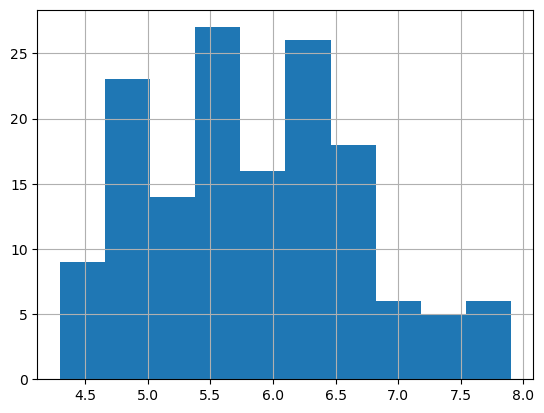

In [264]:
data['SepalLengthCm'].hist();

In [265]:
data.SepalLengthCm.max()

7.9

In [266]:
data.SepalLengthCm.min()

4.3

In [267]:
data.SepalWidthCm.max()

4.4

In [268]:
data.SepalWidthCm.min()

2.0

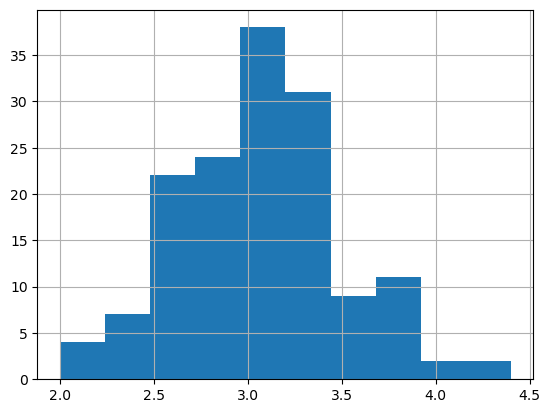

In [269]:
data.SepalWidthCm.hist();

In [270]:
### sepal length and sepal width follows normal distribution

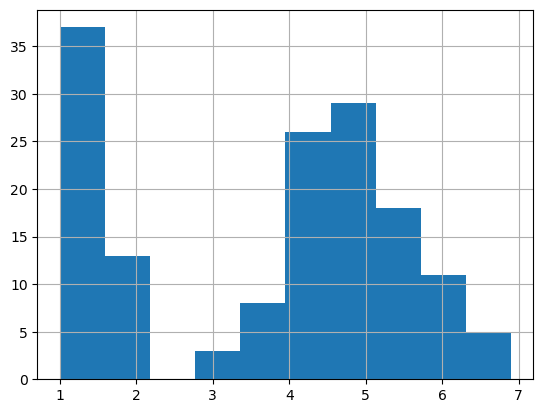

In [271]:
data.PetalLengthCm.hist();

In [272]:
data.PetalLengthCm.max()

6.9

In [273]:
data.PetalLengthCm.min()

1.0

In [274]:
data.PetalWidthCm.max()

2.5

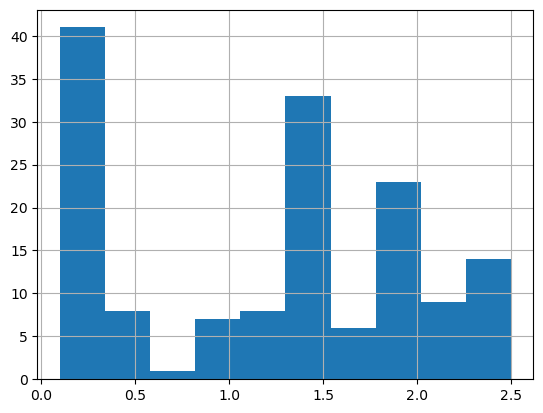

In [275]:
data.PetalWidthCm.hist();

In [276]:
### Boxplot

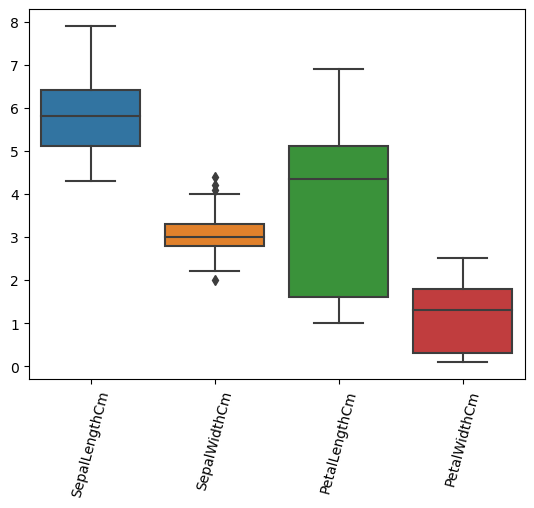

In [279]:
# plt.figure(figsize=(18,6))
plt.xticks(rotation = 75)
sns.boxplot(data=data)
plt.show()

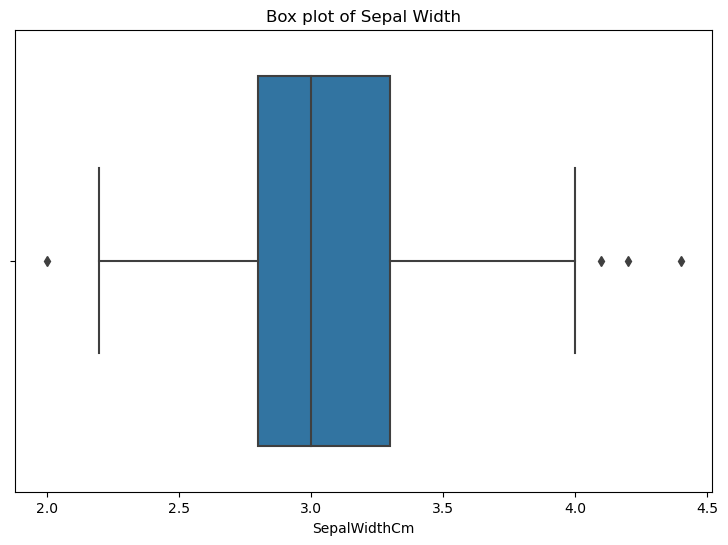

In [280]:
# Visualize Sepal Width using a box plot
plt.figure(figsize=(9, 6))
sns.boxplot(x=data['SepalWidthCm'])
plt.title('Box plot of Sepal Width')
plt.show()

In [281]:
# Calculate the Interquartile Range (IQR)
Q1 = data['SepalWidthCm'].quantile(0.25)
Q3 = data['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['SepalWidthCm'] < lower_threshold) | (data['SepalWidthCm'] > upper_threshold)]


In [282]:
# Replace outliers with median value
median_sepal_width = data['SepalWidthCm'].median()
data.loc[(data['SepalWidthCm'] < lower_threshold) | (data['SepalWidthCm'] > upper_threshold), 'SepalWidthCm'] = median_sepal_width

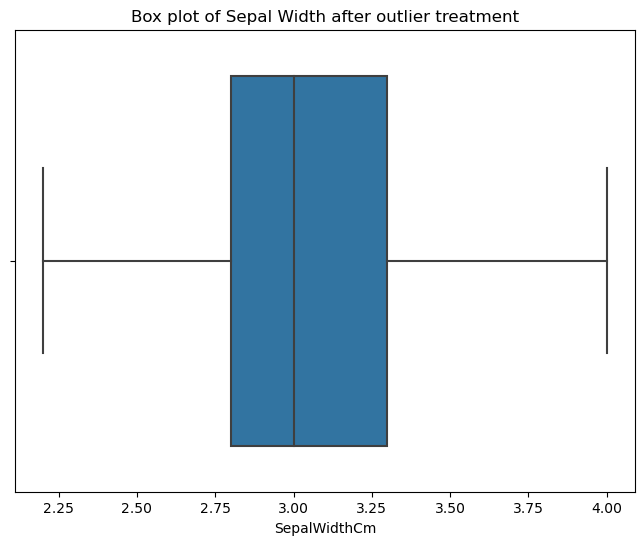

In [239]:
# Visualize Sepal Width after outlier treatment
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['SepalWidthCm'])
plt.title('Box plot of Sepal Width after outlier treatment')
plt.show()

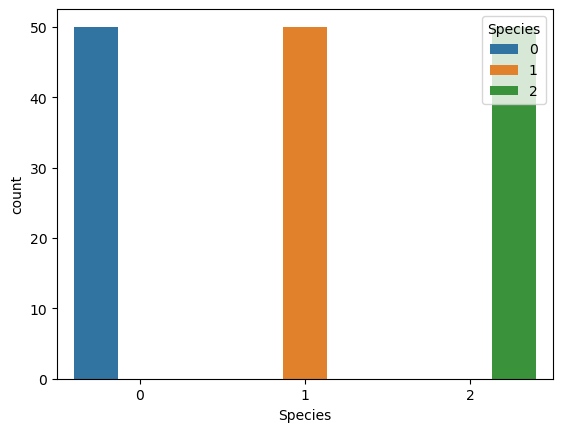

In [240]:
sns.countplot(x='Species',data=data,hue='Species');

In [205]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

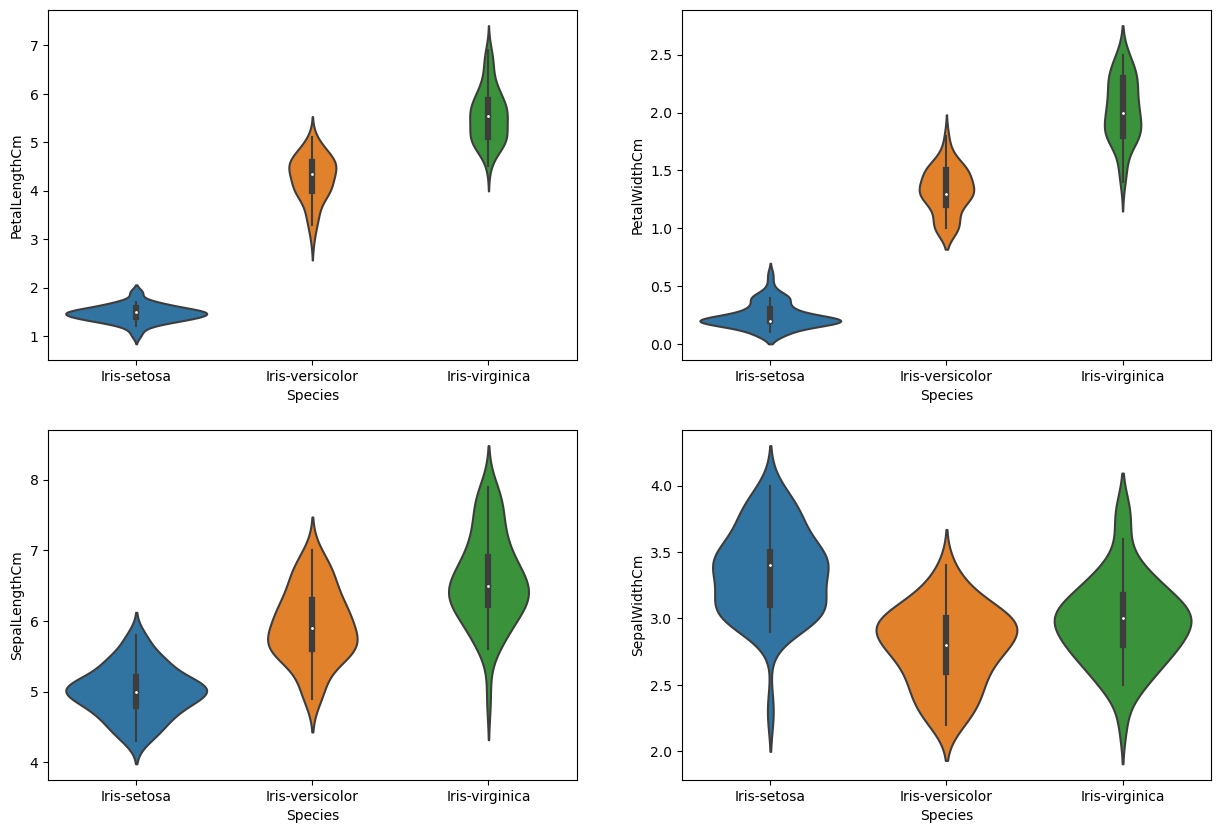

In [283]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

In [284]:
# scatterplot
colors = ['red', 'green', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

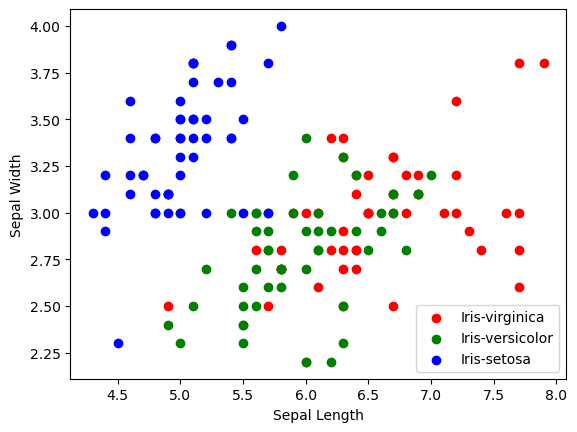

In [285]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width") 
plt.legend();

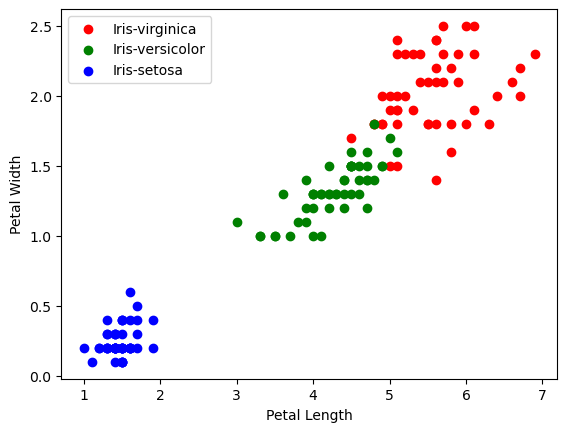

In [286]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

In [287]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [288]:
data.Species.nunique()

3

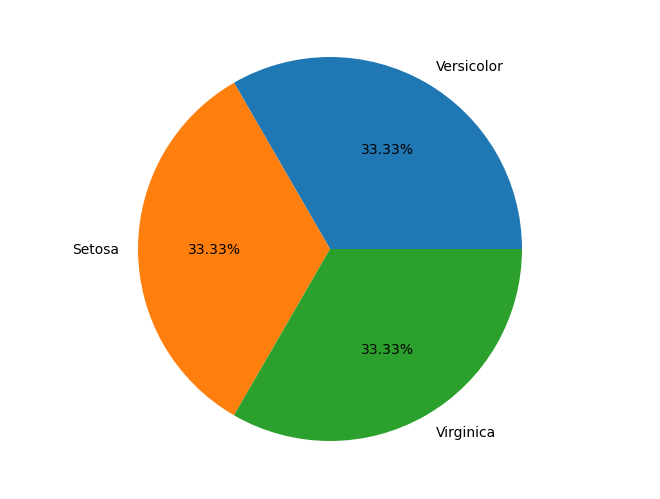

In [289]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [290]:
data.corr()

ValueError: could not convert string to float: 'Iris-setosa'

In [ ]:
### Handling correlation
sns.heatmap(data.corr(),annot=True);

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['Species']=le.fit_transform(data['Species'])
data.head(10)

In [ ]:
data.sample(5)

In [ ]:
### Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_train=scaler.transform(x_test)
x_train

In [291]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


## Model Training

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
x=data.drop(columns='Species')
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [294]:
y=data['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [295]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [296]:
x_train.shape,x_test.shape

((120, 4), (30, 4))

In [297]:
y_train.shape,y_test.shape

((120,), (30,))

## model selection

In [298]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [299]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [300]:
#Using LogisticRegression
model = LogisticRegression()
## model training
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('Accuracy:',metrics.accuracy_score(prediction,y_test))

Accuracy: 1.0


In [301]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(y_test,prediction))

Confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### conclusion

 The accuracy score of 1.0 obtained from the code indicates that the Logistic Regression model achieved perfect accuracy on the test data. This means that the model correctly predicted the species of all the flowers in the test set.